In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz




In [3]:
df = pd.read_csv("heart.csv")
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9853658536585366


In [5]:
X = df.drop("target", axis=1)


In [6]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree, out_file=None,
                           feature_names=X.columns,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'

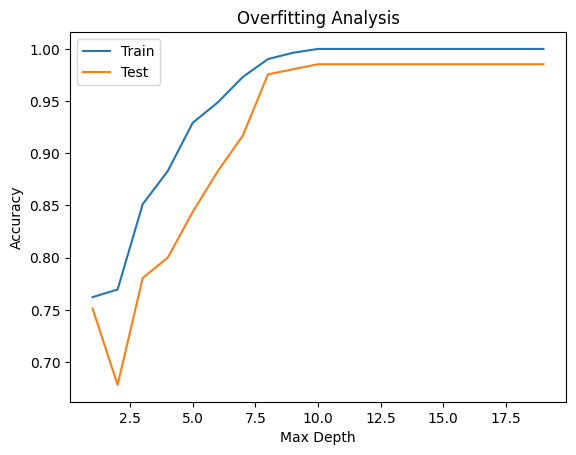

In [7]:
train_scores = []
test_scores = []
depths = range(1, 20)

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(x_train, y_train)
    train_scores.append(tree.score(x_train, y_train))
    test_scores.append(tree.score(x_test, y_test))

plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis')
plt.legend()
plt.show()

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.9853658536585366


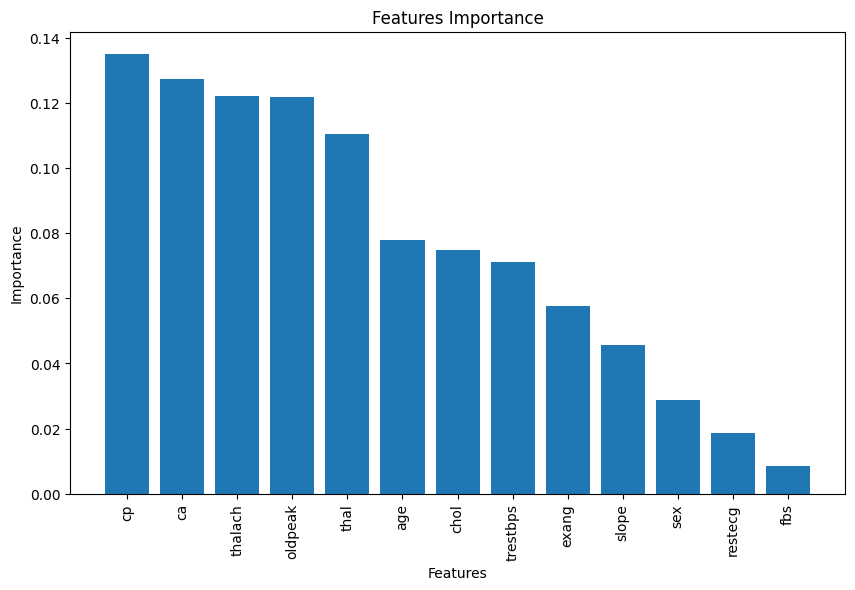

In [9]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importance[indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.title("Features Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

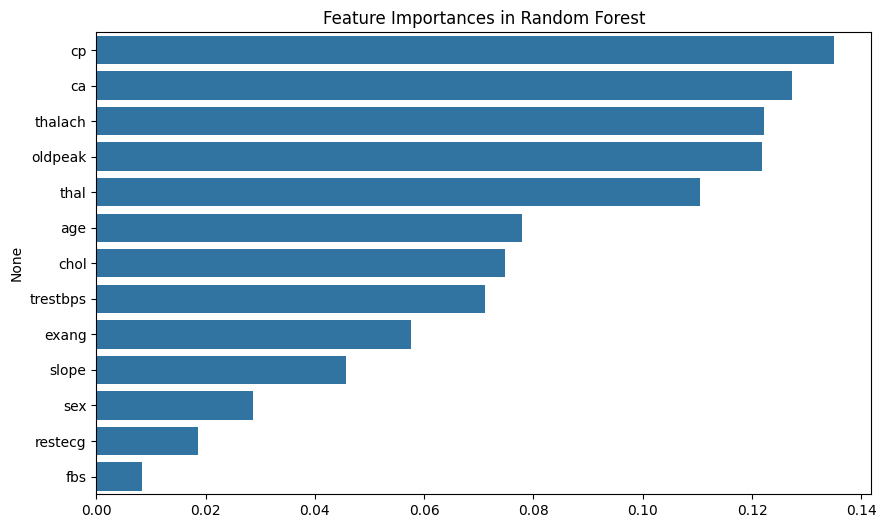

In [10]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances in Random Forest")
plt.show()

In [12]:
cv_score = cross_val_score(rf, x, y, cv=5)
print(f"Cross-Validation Scores: {cv_score}")
print(f"Mean CV Score: {np.mean(cv_score)}")

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Score: 0.9970731707317073
